In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_file='frozen_inference_graph.pb'


In [4]:
model=cv2.dnn_DetectionModel(frozen_file,config_file)

In [5]:
classlabels=[] #empty list of python
file_name='LABELS.txt'
with open(file_name,'rt') as fpt:
    classlabels=fpt.read().rstrip('\n').split('\n')
    #classlabels.append(fpt.read())


In [6]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'sheep', 'cat', 'dog', 'horse', 'bear', 'cow', 'elephant', 'zebra', 'giraffe', 'backpack', 'tie', 'handbag', 'umbrella', 'suitcase', 'frisbee', 'skis', 'keyboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'pencil', 'tennis racket', 'bottle', 'bowl', 'cup', 'fork', 'knife', 'spoon', 'wine glass', 'banana', 'apple', 'pen', 'orange', 'broccoli', 'carrot', 'hot dog', 'potted plant', 'donut', 'dining table', 'chair', 'sofa', 'pizza', 'bed', 'cake', 'toilet', 'tvmonitor', 'laptop', 'book', 'remote', 'snowboard', 'vase', 'mobile', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'mouse', 'clock', 'cell phone', 'scissors', 'teddy bear', 'hair drier']


In [7]:
print(len(classlabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5)) #mobilenet input-> [-1,1]
model.setInputSwapRB(True) #automatically convert to RGB next time onwards


<dnn_Model 00000265FE7DC8B0>

read an image


In [9]:
img=cv2.imread('horse_riding.jpg')

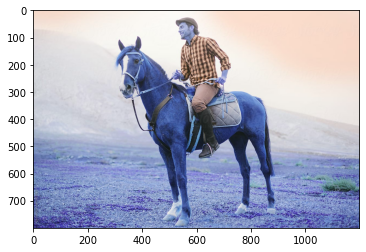

In [10]:
plt.imshow(img)

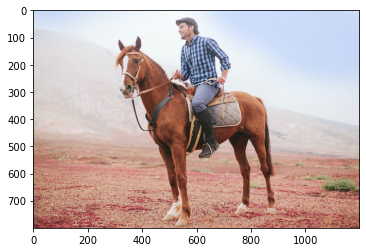

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [12]:
classindex,confidence,bbox=model.detect(img,confThreshold=0.5) #accuracy threshold 50%

In [13]:
print(classindex)

[19  1]


In [14]:
font_scale=3
font=cv2.FONT_HERSHEY_TRIPLEX
#     FONT_HERSHEY_SIMPLEX        = 0, //!< normal size sans-serif font
#     FONT_HERSHEY_PLAIN          = 1, //!< small size sans-serif font
#     FONT_HERSHEY_DUPLEX         = 2, //!< normal size sans-serif font (more complex than FONT_HERSHEY_SIMPLEX)
#     FONT_HERSHEY_COMPLEX        = 3, //!< normal size serif font
#     FONT_HERSHEY_TRIPLEX        = 4, //!< normal size serif font (more complex than FONT_HERSHEY_COMPLEX)
#     FONT_HERSHEY_COMPLEX_SMALL  = 5, //!< smaller version of FONT_HERSHEY_COMPLEX
#     FONT_HERSHEY_SCRIPT_SIMPLEX = 6, //!< hand-writing style font
#     FONT_HERSHEY_SCRIPT_COMPLEX = 7, //!< more complex variant of FONT_HERSHEY_SCRIPT_SIMPLEX
#     FONT_ITALIC                 = 16 //!< flag for italic font
for classind,conf,boxes in zip(classindex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(0,255,0),2)
    cv2.putText(img,classlabels[classind-1],(boxes[0]+10,boxes[1]+50),font,fontScale=font_scale,color=(0,0,255),thickness=2)

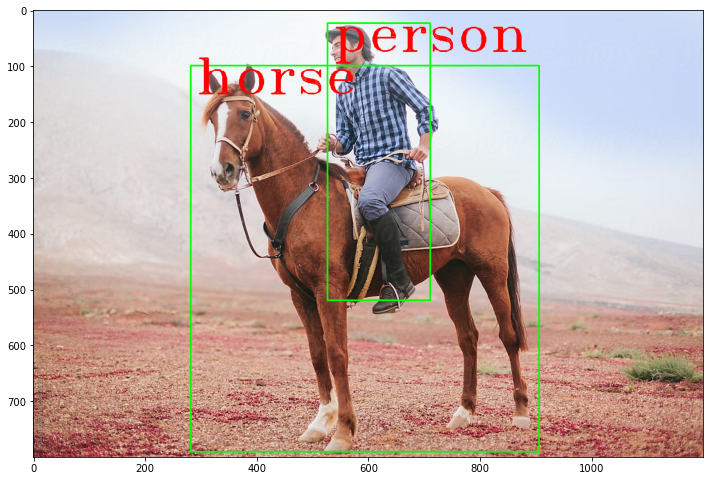

In [15]:
plt.figure(figsize=(12,10))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

read a video

In [16]:
vid=cv2.VideoCapture(0)
# vid.set(3,640)
# vid.set(4,480)

# check if video is opened correctly
if not vid.isOpened():
    vid=cv2.VideoCapture(0)
if not vid.isOpened():
    raise IOError("Cannot open video")
    
font_scale=3
font=cv2.FONT_HERSHEY_TRIPLEX

while True:
    ref,frame=vid.read()
    classindex,confidence,bbox=model.detect(frame,confThreshold=0.55)
    print(classindex)
    if (len(classindex)!=0):
        for classind,conf,boxes in zip(classindex.flatten(),confidence.flatten(),bbox):
            if(classind<=80):
                cv2.rectangle(frame,boxes,(0,255,0),2)
                cv2.putText(frame,classlabels[classind-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=2) 
    cv2.imshow('Image Detection',frame)    
    if cv2.waitKey(2) & 0xFF==ord('d'):
        break
vid.release()
vid.destroyAllWindows()

[82]
[82]
[82  1]
[82  1]
[ 1 82]
[ 1 82]
[ 1 82]
[1]
[ 1 62 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[1]
[ 1 62]
[ 1 62]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 82]
[ 1 82]
[ 1 82]
[1]
[1]
[1]
[ 1 82]
[ 1 82]
[ 1 82]
[ 1 82]
[1]
[1]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 82]
[1]
[1 1]
[ 1 27]
[77 77  1]
[ 1 77 77]
[77  1]
[1]
[1]
[1]
[1]
[1]
[77  1]
[1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 32]
[ 1 32]
[ 1 32]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[ 1 32]
[1]
[1]
[1]
[1]
[ 1 32]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[

KeyboardInterrupt: 